In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import scipy.signal as sig

In [2]:
def mean_prime(prop,filt_b,filt_a):
    
    ti,lt,ln = prop.shape
    prop = prop.reshape(ti,lt*ln)
    
    m_prop = []

    for tot in prop.T:
        # filtered series (mean)
        m_prop.append(sig.filtfilt(filt_b,filt_a,tot))
    
    m_prop = np.array(m_prop)
    m_prop = m_prop.T
    
    p_prop = prop - m_prop

    m_prop = m_prop.reshape(ti,lt,ln)
    p_prop = p_prop.reshape(ti,lt,ln)

    return m_prop,p_prop


def vec_m_p(prop,filt_b,filt_a):

    am=sig.filtfilt(filt_b,filt_a,prop)
    ap = prop - am;

    return am,ap


In [3]:
path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
varf=xr.open_mfdataset(listm[-9:])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listm.sort()
vart=xr.open_mfdataset(listt)




In [4]:
varf

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lev_M: 49, lev_W: 50, time_counter: 274, x: 300, y: 390)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
  * lev_W                 (lev_W) float32 1.0 2.0 3.0 4.0 ... 48.0 49.0 50.0
  * lev_M                 (lev_M) float32 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-11-01T12:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    T2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    Q2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINCV                (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINNCV               (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAIN                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    GLW                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    GSW                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    LH                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    HFX                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    UST                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    U10                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    V10                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    SST                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    WSPD10                (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    UOCE                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    VOCE                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    ZNT                   (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    XKMV                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    XKMH                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    XKHV                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    XKHH                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    BN2                   (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    AKMS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    AKHS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    EXCH_H                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
    EXCH_M                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
Attributes:
    name:                            Out/wrf_3D_Y2011M11_DAY
    description:                     wrf M grid variables
    titl

In [74]:
f=2*(7.29*1e-5)*np.sin(np.radians(np.array(varf.nav_lat.mean())))
ifreq=2*np.pi/(f)
iperiod=(ifreq**-1)*86400

iperiod

1.2010196019583768

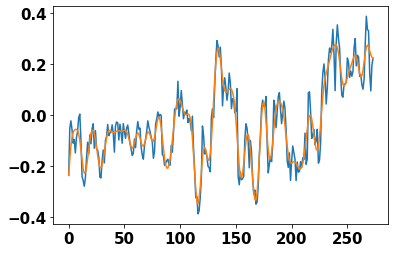

In [106]:
#test with gridpoint
days=4*iperiod
filt_b,filt_a = sig.butter(4,1./days)

afm,afp=vec_m_p(varf.UOCE[:,150,150],filt_b,filt_a,)

atm,atp=vec_m_p(vart.UOCE[:,150,150],filt_b,filt_a,)



plt.figure()
plt.plot(varf.UOCE.data[:,150,150])
plt.plot(afm)

# plt.plot(vart.UOCE.data[:,150,150])
# plt.plot(atm)


# plt.figure()
# plt.plot(atp)
# plt.plot(afp)

## Primes and Means

In [100]:
ufm,ufp=mean_prime(np.array(varf.UOCE),filt_b,filt_a);
utm,utp=mean_prime(np.array(vart.UOCE),filt_b,filt_a);

vfm,vfp=mean_prime(np.array(varf.VOCE),filt_b,filt_a);
vtm,vtp=mean_prime(np.array(vart.VOCE),filt_b,filt_a);


wufm,wufp=mean_prime(np.array(varf.U10),filt_b,filt_a);
wutm,wutp=mean_prime(np.array(vart.U10),filt_b,filt_a);

wvfm,wvfp=mean_prime(np.array(varf.V10),filt_b,filt_a);
wvtm,wvtp=mean_prime(np.array(vart.V10),filt_b,filt_a);


sst_fm,sst_fp=mean_prime(np.array(varf.SST),filt_b,filt_a);
sst_tm,sst_tp=mean_prime(np.array(vart.SST),filt_b,filt_a);

t2_fm,t2_fp=mean_prime(np.array(varf.T2),filt_b,filt_a);
t2_tm,t2_tp=mean_prime(np.array(vart.T2),filt_b,filt_a);




In [101]:
#Eke
ekef=0.5*(ufp**2 + vfp**2)
eket=0.5*(utp**2 + vtp**2)


wekef=0.5*(wufp**2 + wvfp**2)
weket=0.5*(wutp**2 + wvtp**2)

In [102]:

tt=pd.DatetimeIndex(vart.time_counter.data)

In [103]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'


([<matplotlib.axis.XTick at 0x7f5894bb6520>,
 <a list of 5 Text major ticklabel objects>)

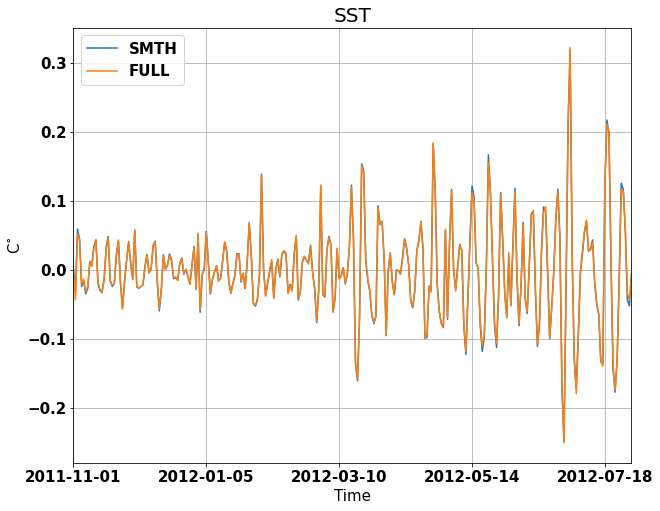

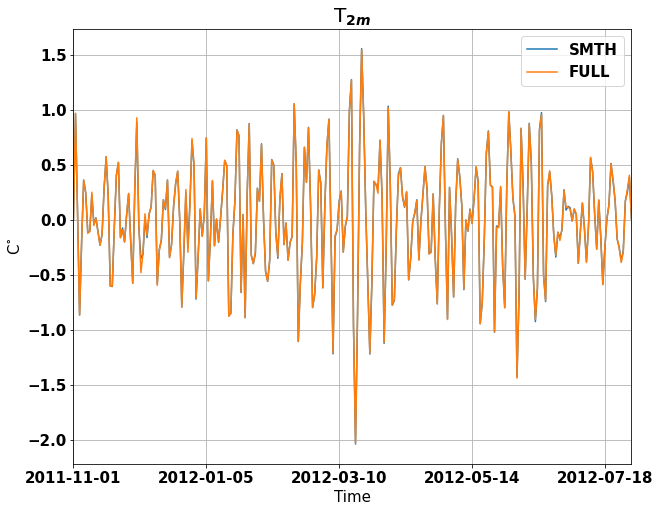

In [104]:

plt.figure(figsize=(10,8))
plt.plot(tt,np.nanmean(np.nanmean(sst_tp,axis=1),axis=1),label='SMTH')
plt.plot(tt,np.nanmean(np.nanmean(sst_fp,axis=1),axis=1),label='FULL')
plt.xlabel('Time')
plt.ylabel(r'C$^{\circ}$')
plt.title('SST',fontsize=20)
plt.legend()
plt.grid()
plt.xlim(tt[0],tt[-1])
plt.xticks(tt[::65])



plt.figure(figsize=(10,8))
plt.plot(tt,np.nanmean(np.nanmean(t2_tp,axis=1),axis=1),label='SMTH')
plt.plot(tt,np.nanmean(np.nanmean(t2_fp,axis=1),axis=1),label='FULL')
plt.xlabel('Time')
plt.ylabel(r'C$^{\circ}$')
plt.title(r'T$_{2m}$',fontsize=20)
plt.legend()
plt.grid()
plt.xlim(tt[0],tt[-1])
plt.xticks(tt[::65])




([<matplotlib.axis.XTick at 0x7f58b42b61f0>,
 <a list of 5 Text major ticklabel objects>)

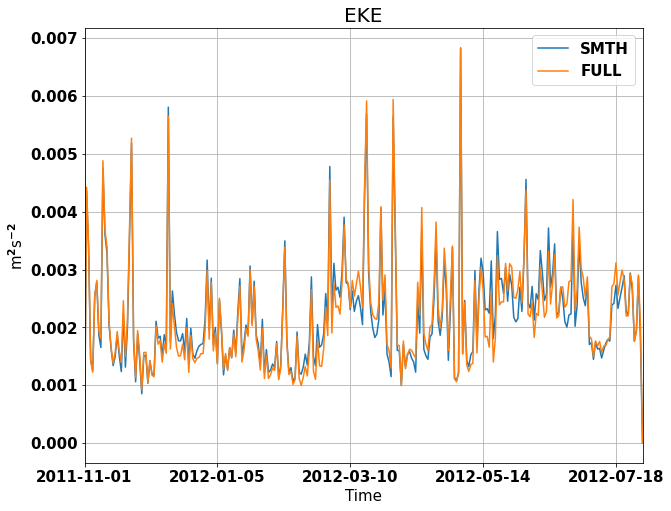

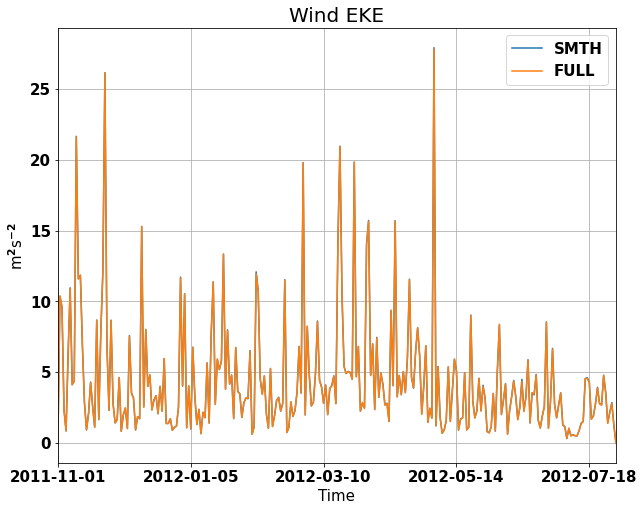

In [105]:


plt.figure(figsize=(10,8))
plt.plot(tt,np.nanmean(np.nanmean(eket,axis=1),axis=1),label='SMTH')
plt.plot(tt,np.nanmean(np.nanmean(ekef,axis=1),axis=1),label='FULL')
plt.xlabel('Time')
plt.ylabel(r'm$^2$s$^{-2}$')
plt.title('EKE',fontsize=20)
plt.legend()
plt.grid()
plt.xlim(tt[0],tt[-1])
plt.xticks(tt[::65])




plt.figure(figsize=(10,8))
plt.plot(tt,np.nanmean(np.nanmean(weket,axis=1),axis=1),label='SMTH')
plt.plot(tt,np.nanmean(np.nanmean(wekef,axis=1),axis=1),label='FULL')
plt.xlabel('Time')
plt.ylabel(r'm$^2$s$^{-2}$')
plt.title('Wind EKE',fontsize=20)
plt.legend()
plt.grid()
plt.xlim(tt[0],tt[-1])
plt.xticks(tt[::65])

